The data set I used in this kernel contains details of a bank's customers.

The target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or s/he continues to be a customer.

In order to predict target variables, I will use sklearn classification algorithms:

1. Logistic Regression
2. KNN
3. SVM
4. Decision Tree
5. Random Forest
6. Naive Bayes

After implementing each model, I used score and confusion matrix methods to compare models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #count plot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

Load data

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)

In [6]:
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

In [7]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


0    7963
1    2037
Name: Exited, dtype: int64

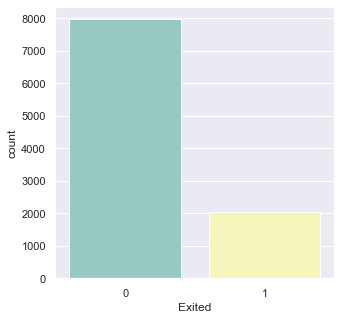

In [8]:
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data, palette='Set3')
data.loc[:,'Exited'].value_counts()

In [9]:
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [10]:
x_data = data.drop(['Exited'], axis=1)

In [11]:
x_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


## Normalizing the data

In [12]:
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)

In [14]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


## Logistic Regression

In [15]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred0 = lr.predict(x_test)

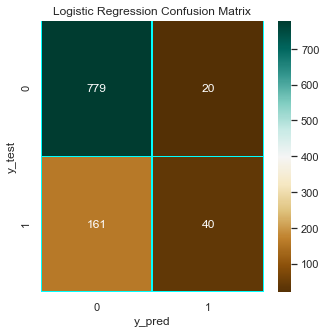

In [16]:
cm_LR = confusion_matrix(y_test, y_pred0)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_LR, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [17]:
score_lr = lr.score(x_test, y_test)
print(score_lr)

0.819


## KNN CLASSIFICATION ALGORITHM:

In [18]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(x_train, y_train)

y_pred1 = knn.predict(x_test)

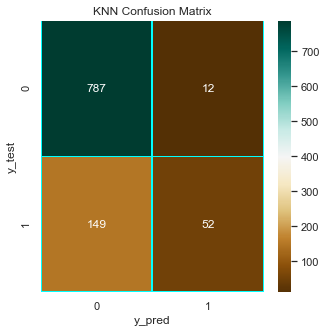

In [19]:
cm_KNN = confusion_matrix(y_test, y_pred1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_KNN, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [20]:
score_knn = knn.score(x_test, y_test)
print(score_knn)

0.839


## SUPPORT VECTOR MACHINE (SVM) ALGORITHM:

In [21]:
svm = SVC(random_state=2)

svm.fit(x_train, y_train)

y_pred2 = svm.predict(x_test)

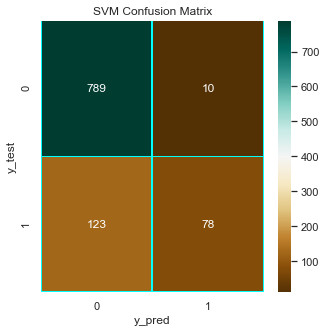

In [22]:
cm_SVM = confusion_matrix(y_test, y_pred2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_SVM, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('SVM Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [23]:
score_svm = svm.score(x_test, y_test)
print(score_svm)

0.867


## NAIVE BAYES ALGORITHM:

In [24]:
nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred3 = nb.predict(x_test)

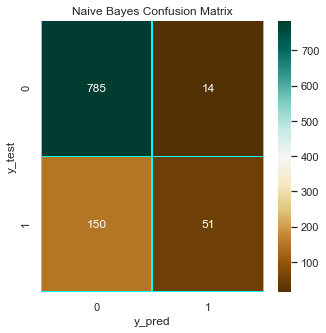

In [25]:
cm_NB = confusion_matrix(y_test, y_pred3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_NB, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [26]:
score_nb = nb.score(x_test, y_test)
print(score_nb)

0.836


## DECISION TREE ALGORITHM:

In [27]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred4 = dt.predict(x_test)

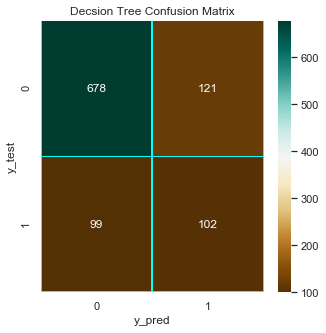

In [28]:
cm_DT = confusion_matrix(y_test, y_pred4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_DT, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Decsion Tree Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [29]:
score_dt = dt.score(x_test, y_test)
print(score_dt)

0.78


In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=3)

rf.fit(x_train, y_train)

y_pred5 = rf.predict(x_test)

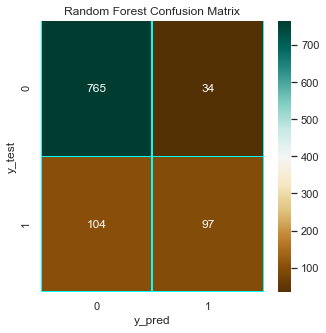

In [31]:
cm_RF = confusion_matrix(y_test, y_pred5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_RF, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [32]:
score_rf = rf.score(x_test, y_test)
print(score_rf)

0.862


In [33]:
data_scores = pd.Series([score_lr, score_knn, score_svm, score_nb, score_dt, score_rf], 
                        index=['logistic_regression_score', 'knn_score', 'svm_score', 'naive_bayes_score', 'decision_tree_score', 'random_forest_score']) 
data_scores

logistic_regression_score    0.819
knn_score                    0.839
svm_score                    0.867
naive_bayes_score            0.836
decision_tree_score          0.780
random_forest_score          0.862
dtype: float64

In [34]:
d = {'y_test': y_test, 'log_reg_pred': y_pred0,'knn_prediction': y_pred1, 
     'svm_prediction': y_pred2, 'naive_bayes_prediction': y_pred3, 
     'decision_tree_prediction': y_pred4, 'random_forest_prediction': y_pred5}
data01 = pd.DataFrame(data=d)
data01.T

,1977,3880,52,2551,2246,270,601,2441,3286,2967,...,5640,1831,2217,6191,1797,15,9109,9128,4083,3747
y_test,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
log_reg_pred,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
knn_prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
svm_prediction,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
naive_bayes_prediction,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
decision_tree_prediction,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
random_forest_prediction,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


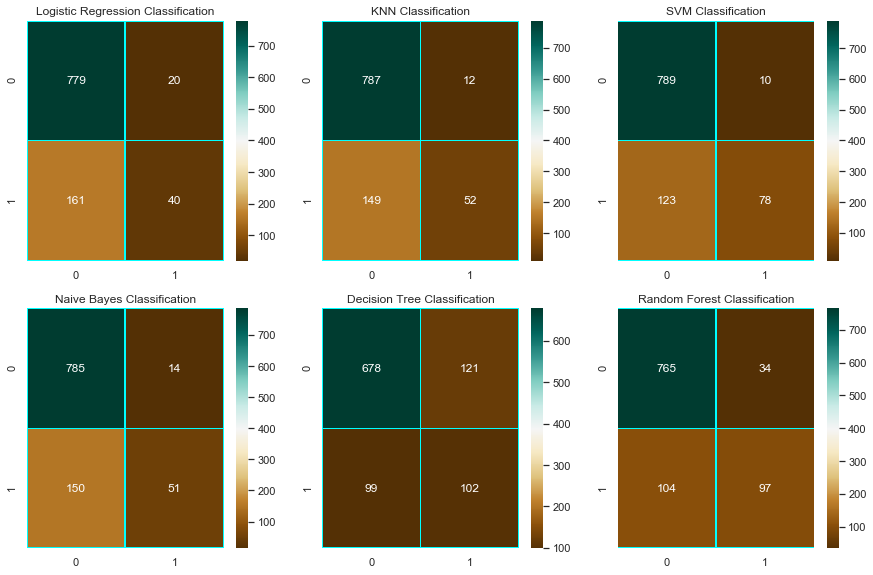

In [35]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')

sns.heatmap(data=cm_LR, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BrBG')
sns.heatmap(data=cm_KNN, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   
sns.heatmap(data=cm_SVM, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BrBG')
sns.heatmap(data=cm_NB, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BrBG')
sns.heatmap(data=cm_DT, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BrBG')
sns.heatmap(data=cm_RF, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BrBG')
plt.show()